In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import scipy
from pyRF.circuit import Circuit
from pyRF.feedline import TimeDomainSolution
from pyRF.Experimental.examples.feedline_time_domain import Feedline
from pyRF.Experimental.examples.quarter_wave_resonator import QuarterWave
from pyRF.feedline import TimeDomainSolution
from pyRF.Experimental.examples.coupled_resonator_feedline import ResonatorFeedline

In [3]:
resonator_feedline_circuit = ResonatorFeedline('quarter_wave')
resonator_feedline_circuit.initialize()
R1 = resonator_feedline_circuit.resonator_dict['R1']
F1 = resonator_feedline_circuit.feedline_dict['F1']

In [4]:
R1.matrix_condition(60)

array([[-1.   +0.j   ,  1.   +0.j   ],
       [ 0.992+0.125j, -1.   +0.j   ]])

In [5]:
fr = R1.get_eigenvalue()*1e8
fr

6249999999.999999

In [6]:
fr*1e-9

6.249999999999999

In [7]:
phi = R1.get_eigenfunction()
phi(0)

array(22.361+0.j)

In [8]:
k=60
feedline_a, feedline_b = F1.get_eigenfunction(k)

In [9]:
feedline_b(10e-3)

array(-0.809-0.588j)

c:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


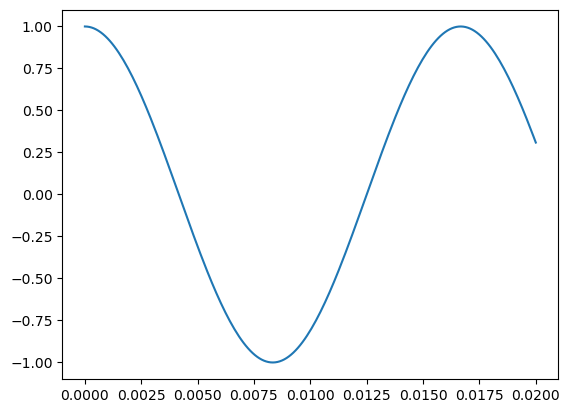

In [10]:
feedline_a.plot()

In [27]:
Z0=50
phi0=1e8
clengthinv = Z0*phi0
cap = 30e-15
ja = abs(feedline_a(10e-3)*cap*clengthinv*phi(0))
print(ja)

jb = abs(feedline_b(10e-3)*cap*clengthinv*phi(0))
print(jb)

0.003354101966249685
0.003354101966249685


In [50]:
SD = np.array([[1, 0, ja],
               [0, 1, jb],
               [ja, jb, 1]])
f = fr*0.99#k*phi0*1.02
M = np.array([[f**2, 0, 0],
              [0, f**2, 0],
              [0, 0, fr**2]])*1e-18
A = scipy.linalg.inv(SD)@M
vecs = scipy.linalg.inv(SD)@np.eye(3)
eigval, eigvec = scipy.linalg.eig(A)
print(np.sqrt(eigval))
print(eigvec)

[6.253+0.j 6.188+0.j 6.184+0.j]
[[-0.156 -0.707  0.69 ]
 [-0.156  0.707  0.69 ]
 [ 0.975 -0.     0.217]]


In [42]:
np.array([[1], [0],[ 0]]).T @eigvec 

array([[-0.156, -0.707,  0.69 ]])

In [56]:

eigvec @ np.diag(np.array([1/(eigval[0]-eigval[1]), 0,0])) @ np.linalg.inv(eigvec)

array([[ 0.029+0.j,  0.029+0.j, -0.186+0.j],
       [ 0.029+0.j,  0.029+0.j, -0.186+0.j],
       [-0.182+0.j, -0.182+0.j,  1.162+0.j]])

In [59]:
eigvec @ np.diag(np.array([0, 1, 0])) @ np.linalg.inv(eigvec)


array([[ 0.5, -0.5,  0. ],
       [-0.5,  0.5, -0. ],
       [ 0. , -0. ,  0. ]])

In [58]:
eigvec @ np.diag(np.array([0, 0, 1/(eigval[2]-eigval[1])])) @ np.linalg.inv(eigvec)


array([[-11.828+0.j, -11.828+0.j,  -3.787+0.j],
       [-11.828+0.j, -11.828+0.j,  -3.787+0.j],
       [ -3.711+0.j,  -3.711+0.j,  -1.188+0.j]])

In [ ]:
eig[:,0]*np.diag()

In [29]:
eig, eigvec = scipy.linalg.eig((A-f**2*np.eye(3))*1e-18)

In [23]:
eig

array([0.   +0.j, 0.   +0.j, 1.608+0.j])

In [217]:
scipy.linalg.det((A-f**2*np.eye(3))*1e-18)

-9.615589874979584e-18

In [190]:
vecs

array([[ 1.   ,  0.   , -0.003],
       [ 0.   ,  1.   , -0.003],
       [-0.003, -0.003,  1.   ]])

In [185]:
(scipy.linalg.inv(eigvec))
# (z[:,0] + z[:,1])/np.sqrt(2)


array([[-0.5  , -0.5  ,  0.707],
       [-0.707,  0.707,  0.   ],
       [ 0.5  ,  0.5  ,  0.707]])

In [152]:
jflk = phi*c*clengthinv*psi
jresk = phi*c*clengthinv*psi

TDcoupling = jflk*jresk*np.pi**2/phi0*2

NameError: name 'c' is not defined

In [31]:
R1.mode_condition(fr*1e-8)

[3.879634666901867e-18, -2.081306613249581e-16]

In [25]:
F1.get_eigenfunction(60)